In [60]:
import torch
from PIL import Image
from torchvision import transforms
from efficientnet_pytorch import EfficientNet
from torch import nn
import numpy as np
import torch.nn.functional as F

In [3]:
class Net(nn.Module):
    def __init__(self, net_version, num_classes):
        super(Net, self).__init__()
        self.backbone = EfficientNet.from_pretrained(
            'efficientnet-' + net_version
        )
        self.backbone._fc = nn.Sequential(
            nn.Linear(1280, num_classes),
        )

    def forward(self, x):
        return self.backbone(x)


In [135]:
DEVICE = 'cpu'

def get_transform():
    return transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
        ]
    )

class ModelInfer:
    def __init__(self, weights_path) -> None:
        self._model = None
        self._weights_path = weights_path
        self._transform = get_transform()
        self._load_model()
        self._load_model_weights()

    def _load_model(self) -> None:
        self._model = Net(net_version='b0', num_classes=2).to(DEVICE)
        print('model loaded')

    def process(self, image: Image.Image) -> np.ndarray:
        image_processed = self._transform(image)
        image_processed = image_processed.unsqueeze(0)
        return image_processed

    def predict(self, image: np.ndarray):
        self._model.eval()

        with torch.no_grad():

            output = self._model(image.to(DEVICE))
            scores = torch.sigmoid(output)
            predictions = (scores > 0.5).float()
            _, pred = torch.min(predictions, 1)

        return pred.item()
    
    def predict_target_prob(self, image: np.ndarray):
        self._model.eval()

        with torch.no_grad():
            output = self._model(image.to(DEVICE))
            probabilidades = F.softmax(output, dim=1)

        return probabilidades.squeeze()[0].item()

    def _load_model_weights(self):
        checkpoint = torch.load(
            self._weights_path, map_location=torch.device(DEVICE)
        )
        self._model.load_state_dict(checkpoint['state_dict'])

In [137]:
model = ModelInfer('./binary_models/artifacts/hiper_others_2023-05-12-18-06-48/4_fold_max_acc_checkpoint.pth.tar')

Loaded pretrained weights for efficientnet-b0
model loaded


In [147]:
# imagem1 = Image.open('C:/Users/Maods/Documents/Development/Mestrado/terumo/apps/terumo-model-binary-glomerulus-hypercellularity/data/raw/hipercellularity/HE/113IP66098AAD.jpg')
imagem1 = Image.open(r'C:\Users\Maods\Documents\Development\Mestrado\terumo\apps\terumo-model-binary-glomerulus-hypercellularity\data\raw\hipercellularity\PAS\2005PC1814an.jpg')
imagem2 = Image.open(r'C:\Users\Maods\Documents\Development\Mestrado\terumo\apps\terumo-model-binary-glomerulus-hypercellularity\data\raw\hipercellularity\HE\2005PC1682aj.jpg')
imagem3 = Image.open(r'C:\Users\Maods\Documents\Development\Mestrado\terumo\apps\terumo-model-binary-glomerulus-hypercellularity\data\raw\hipercellularity\AZAN\PSHIPERCELULARIDADE20200802-23.JPG')
imagem4 = Image.open(r'C:\Users\Maods\Documents\Development\Mestrado\terumo\apps\terumo-core\image_storage\1700801601.938088_Foto 3x4.png').convert('RGB')

model.predict_target_prob(
model.process(imagem4)
)

0.0025946691166609526

ValueError: Could not save to JPEG for display

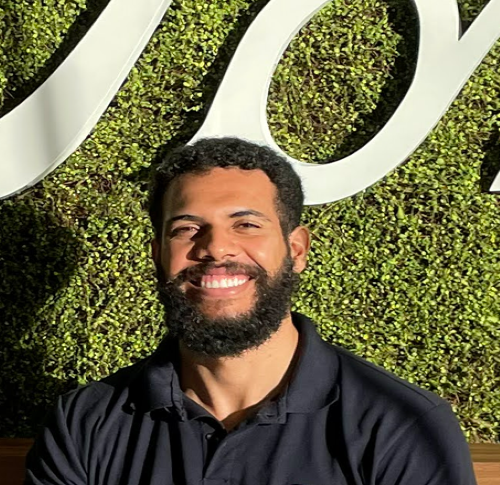

In [145]:
imagem4

In [139]:
model.predict_target_prob(
model.process(imagem1)
)

0.9988340735435486

In [140]:
model.predict_target_prob(
model.process(imagem2)
)

0.9975802898406982

In [141]:
model.predict_target_prob(
model.process(imagem3)
)

0.9999994039535522

In [142]:
image_process = model.process(imagem3)

In [112]:


with torch.no_grad():
    output = model._model(image_process.to(DEVICE))
    scores = torch.sigmoid(output)
    predictions = (scores > 0.5).float()
    _, pred = torch.min(predictions, 1)
    probabilidades = F.softmax(output, dim=1)

In [113]:
with torch.no_grad():
    output = model._model(image_process.to(DEVICE))
    probabilidades = F.softmax(output, dim=1)

probabilidades.squeeze()[1].item()

0.9979738593101501

In [114]:
probabilidades

tensor([[0.0020, 0.9980]])

In [115]:
output

tensor([[-3.2767,  2.9230]])

In [116]:
scores

tensor([[0.0364, 0.9490]])

In [117]:
predictions

tensor([[0., 1.]])

In [118]:
pred.item()

0

In [107]:
torch.argmax(output, dim=1)

tensor([1])

In [108]:
probabilidades

tensor([[0.0031, 0.9969]])